# 数据集加载


In [3]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
from argparse import Namespace
# from model import MLP

from torch import nn
from dataloader import load_data
from tqdm import tqdm




device='cuda:1'
train_inputs,train_lables,test_inputs,test_lables=load_data(3000,3000,device=torch.device(device))




load data set
create loader
construct data


100%|██████████| 14/14 [00:01<00:00, 12.05it/s]


# MLP训练

In [5]:
import model3 as model3 
# from model4 import MLP
import importlib
importlib.reload(model3)
MLP=model3.MLP 
mlp = MLP()
mlp.train()

MLP(
  (layer1): Linear(in_features=784, out_features=1024, bias=True)
  (layer2): LeakyReLU(negative_slope=0.1)
  (layer3): Linear(in_features=1024, out_features=128, bias=True)
  (layer4): LeakyReLU(negative_slope=0.1)
  (layer5): Linear(in_features=128, out_features=64, bias=True)
  (layer6): LeakyReLU(negative_slope=0.1)
  (layer7): Linear(in_features=64, out_features=32, bias=True)
  (layer8): LeakyReLU(negative_slope=0.1)
  (layer9): Linear(in_features=32, out_features=10, bias=True)
)

epoch0 loss:2.658140182495117
epoch0 acc:0.097725
epoch1 loss:2.4318840503692627
epoch1 acc:0.1372
epoch2 loss:2.3103747367858887
epoch2 acc:0.1733
epoch3 loss:2.226656913757324
epoch3 acc:0.208775
epoch4 loss:2.1604628562927246
epoch4 acc:0.2371
epoch5 loss:2.104423761367798
epoch5 acc:0.260825
epoch6 loss:2.054980516433716
epoch6 acc:0.282725
epoch7 loss:2.010185718536377
epoch7 acc:0.301525
epoch8 loss:1.9687494039535522
epoch8 acc:0.3189
epoch9 loss:1.9298012256622314
epoch9 acc:0.334525
epoch10 loss:1.8928968906402588
epoch10 acc:0.350175
epoch11 loss:1.8576775789260864
epoch11 acc:0.365625
epoch12 loss:1.8238189220428467
epoch12 acc:0.381175
epoch13 loss:1.791068196296692
epoch13 acc:0.3967
epoch14 loss:1.7593050003051758
epoch14 acc:0.412
epoch15 loss:1.728365421295166
epoch15 acc:0.42865
epoch16 loss:1.6981245279312134
epoch16 acc:0.44455
epoch17 loss:1.668472170829773
epoch17 acc:0.4612
epoch18 loss:1.639362096786499
epoch18 acc:0.47765
epoch19 loss:1.6107555627822876
epoch19 

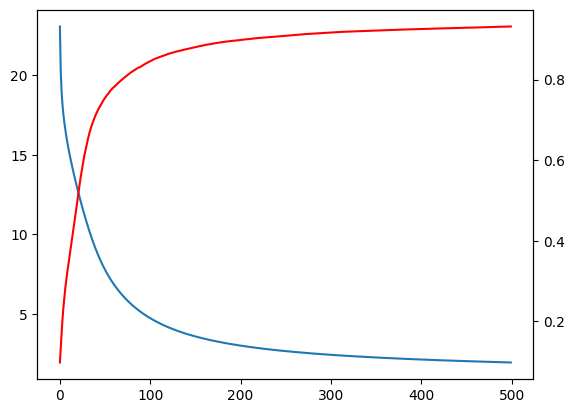

In [6]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1e-3,
    epoch         = 500,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total



mlp.to(device,non_blocking=True)
optimizer = torch.optim.SGD(mlp.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = mlp(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    
    acci=acc(mlp)
    print(f"epoch{epoch} acc:{acci}")
    acc_list.append(acci)
    loss_list.append(ls)


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()


In [7]:
# spmodel=torch.jit.script(mlp)
torch.save(mlp,'mlp.pth')

# 卷积训练

In [7]:
import conv 
# from model4 import MLP
import importlib
importlib.reload(conv)
Conv=conv.Conv
Model = Conv()
Model .train()

Conv(
  (layer1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (layer2): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (layer3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1))
  (layer4): Flatten(start_dim=1, end_dim=-1)
  (layer5): Linear(in_features=7744, out_features=10, bias=True)
)

cuda:1
start_train
epoch0 loss:0.43853092193603516
epoch0 acc:0.8813
epoch1 loss:0.43188443779945374
epoch1 acc:0.882575
epoch2 loss:0.4257231056690216
epoch2 acc:0.88355
epoch3 loss:0.41999563574790955
epoch3 acc:0.884375
epoch4 loss:0.41465750336647034
epoch4 acc:0.88565
epoch5 loss:0.4096698462963104
epoch5 acc:0.8869
epoch6 loss:0.4049987494945526
epoch6 acc:0.887975
epoch7 loss:0.4006141722202301
epoch7 acc:0.8884
epoch8 loss:0.3964899778366089
epoch8 acc:0.88935
epoch9 loss:0.3926028311252594
epoch9 acc:0.890175
epoch10 loss:0.3889320194721222
epoch10 acc:0.891
epoch11 loss:0.3854590952396393
epoch11 acc:0.891725
epoch12 loss:0.38216763734817505
epoch12 acc:0.89275
epoch13 loss:0.3790431022644043
epoch13 acc:0.89375
epoch14 loss:0.37607213854789734
epoch14 acc:0.894125
epoch15 loss:0.3732430934906006
epoch15 acc:0.8947
epoch16 loss:0.37054523825645447
epoch16 acc:0.8951
epoch17 loss:0.36796894669532776
epoch17 acc:0.895675
epoch18 loss:0.3655053377151489
epoch18 acc:0.896025
epoc

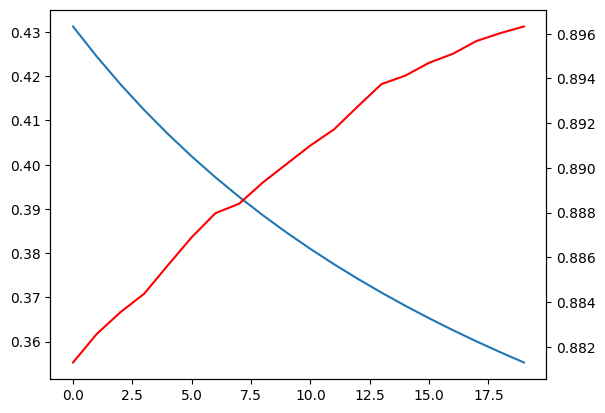

In [10]:
from matplotlib import pyplot as plt
param=Namespace(
    lr            = 1e-4,
    epoch         = 20,  
)

def acc(model):
    model.eval()
    correct=0
    total=0
    with torch.no_grad():
        
        for i in range(len(test_inputs)):
            outputs=model(test_inputs[i])
            _,predicted=torch.max(outputs.data,1)
            total+=len(predicted)
            correct+=(predicted==test_lables[i]).sum().item()
    model.train()
    return correct/total



Model.to(device,non_blocking=True)
print(next(Model.parameters()).device)
optimizer = torch.optim.SGD(Model.parameters(), lr=param.lr)
loss_function = nn.CrossEntropyLoss()

loss_list=[]
acc_list=[]

print("start_train")

for epoch in range(param.epoch):
    ls=0
    for i in range(len(train_inputs)): 
        inputi  = train_inputs[i]
        label  = train_lables[i]
        output = Model(inputi)
        loss   = loss_function(output,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ls+=loss
        
    print(f"epoch{epoch} loss:{loss}")
    
    acci=acc(Model)
    print(f"epoch{epoch} acc:{acci}")
    acc_list.append(acci)
    loss_list.append(ls/len(train_inputs))


y1=plt.subplot()
loss_list=[i.cpu().detach().numpy() for i in loss_list]

y1.plot(range(param.epoch),loss_list,label='loss')

y2=y1.twinx()
y2.plot(range(param.epoch),acc_list,label='acc',color='r')

plt.show()


In [11]:
torch.save(Model,'./conv.pth')